<!-- Autogenerated by `scripts/make_examples.py` -->
<table align="left">
    <td>
        <a target="_blank" href="https://colab.research.google.com/github/voxel51/fiftyone-examples/blob/master/examples/Grouped Datasets.ipynb">
            <img src="https://user-images.githubusercontent.com/25985824/104791629-6e618700-5769-11eb-857f-d176b37d2496.png" height="32" width="32">
            Try in Google Colab
        </a>
    </td>
    <td>
        <a target="_blank" href="https://nbviewer.jupyter.org/github/voxel51/fiftyone-examples/blob/master/examples/Grouped Datasets.ipynb">
            <img src="https://user-images.githubusercontent.com/25985824/104791634-6efa1d80-5769-11eb-8a4c-71d6cb53ccf0.png" height="32" width="32">
            Share via nbviewer
        </a>
    </td>
    <td>
        <a target="_blank" href="https://github.com/voxel51/fiftyone-examples/blob/master/examples/Grouped Datasets.ipynb">
            <img src="https://user-images.githubusercontent.com/25985824/104791633-6efa1d80-5769-11eb-8ee3-4b2123fe4b66.png" height="32" width="32">
            View on GitHub
        </a>
    </td>
    <td>
        <a href="https://github.com/voxel51/fiftyone-examples/raw/master/examples/Grouped Datasets.ipynb" download>
            <img src="https://user-images.githubusercontent.com/25985824/104792428-60f9cc00-576c-11eb-95a4-5709d803023a.png" height="32" width="32">
            Download notebook
        </a>
    </td>
</table>


# <span style="color: orange">**FiftyOne Group Datasets**


## Creating your First Grouped Dataset

In [1]:
import fiftyone as fo
import fiftyone.utils.random as four
import fiftyone.zoo as foz

dataset = fo.Dataset("first-group-dataset")
dataset.add_group_field("group", default="center")

### Adding Images to the dataset

In [2]:
groups = ["left", "center", "right"]

d = foz.load_zoo_dataset("quickstart")
four.random_split(d, {g: 1 / len(groups) for g in groups})
filepaths = [d.match_tags(g).values("filepath") for g in groups]
filepaths = [dict(zip(groups, fps)) for fps in zip(*filepaths)]

samples = []
for fps in filepaths:
    group = fo.Group()
    for name, filepath in fps.items():
        sample = fo.Sample(filepath=filepath, group=group.element(name))
        samples.append(sample)

dataset.add_samples(samples)

Dataset already downloaded
Loading 'quickstart'
 100% |█████████████████| 200/200 [2.5s elapsed, 0s remaining, 77.1 samples/s]       
Dataset 'quickstart' created
 100% |█████████████████| 198/198 [52.7ms elapsed, 0s remaining, 3.8K samples/s]      


['64f0ff20cb1bdc1e2ee070e2',
 '64f0ff20cb1bdc1e2ee070e3',
 '64f0ff20cb1bdc1e2ee070e4',
 '64f0ff20cb1bdc1e2ee070e5',
 '64f0ff20cb1bdc1e2ee070e6',
 '64f0ff20cb1bdc1e2ee070e7',
 '64f0ff20cb1bdc1e2ee070e8',
 '64f0ff20cb1bdc1e2ee070e9',
 '64f0ff20cb1bdc1e2ee070ea',
 '64f0ff20cb1bdc1e2ee070eb',
 '64f0ff20cb1bdc1e2ee070ec',
 '64f0ff20cb1bdc1e2ee070ed',
 '64f0ff20cb1bdc1e2ee070ee',
 '64f0ff20cb1bdc1e2ee070ef',
 '64f0ff20cb1bdc1e2ee070f0',
 '64f0ff20cb1bdc1e2ee070f1',
 '64f0ff20cb1bdc1e2ee070f2',
 '64f0ff20cb1bdc1e2ee070f3',
 '64f0ff20cb1bdc1e2ee070f4',
 '64f0ff20cb1bdc1e2ee070f5',
 '64f0ff20cb1bdc1e2ee070f6',
 '64f0ff20cb1bdc1e2ee070f7',
 '64f0ff20cb1bdc1e2ee070f8',
 '64f0ff20cb1bdc1e2ee070f9',
 '64f0ff20cb1bdc1e2ee070fa',
 '64f0ff20cb1bdc1e2ee070fb',
 '64f0ff20cb1bdc1e2ee070fc',
 '64f0ff20cb1bdc1e2ee070fd',
 '64f0ff20cb1bdc1e2ee070fe',
 '64f0ff20cb1bdc1e2ee070ff',
 '64f0ff20cb1bdc1e2ee07100',
 '64f0ff20cb1bdc1e2ee07101',
 '64f0ff20cb1bdc1e2ee07102',
 '64f0ff20cb1bdc1e2ee07103',
 '64f0ff20cb1b

In [3]:
print(dataset)

Name:        first-group-dataset
Media type:  group
Group slice: center
Num groups:  66
Persistent:  False
Tags:        []
Sample fields:
    id:       fiftyone.core.fields.ObjectIdField
    filepath: fiftyone.core.fields.StringField
    tags:     fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.Metadata)
    group:    fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.groups.Group)



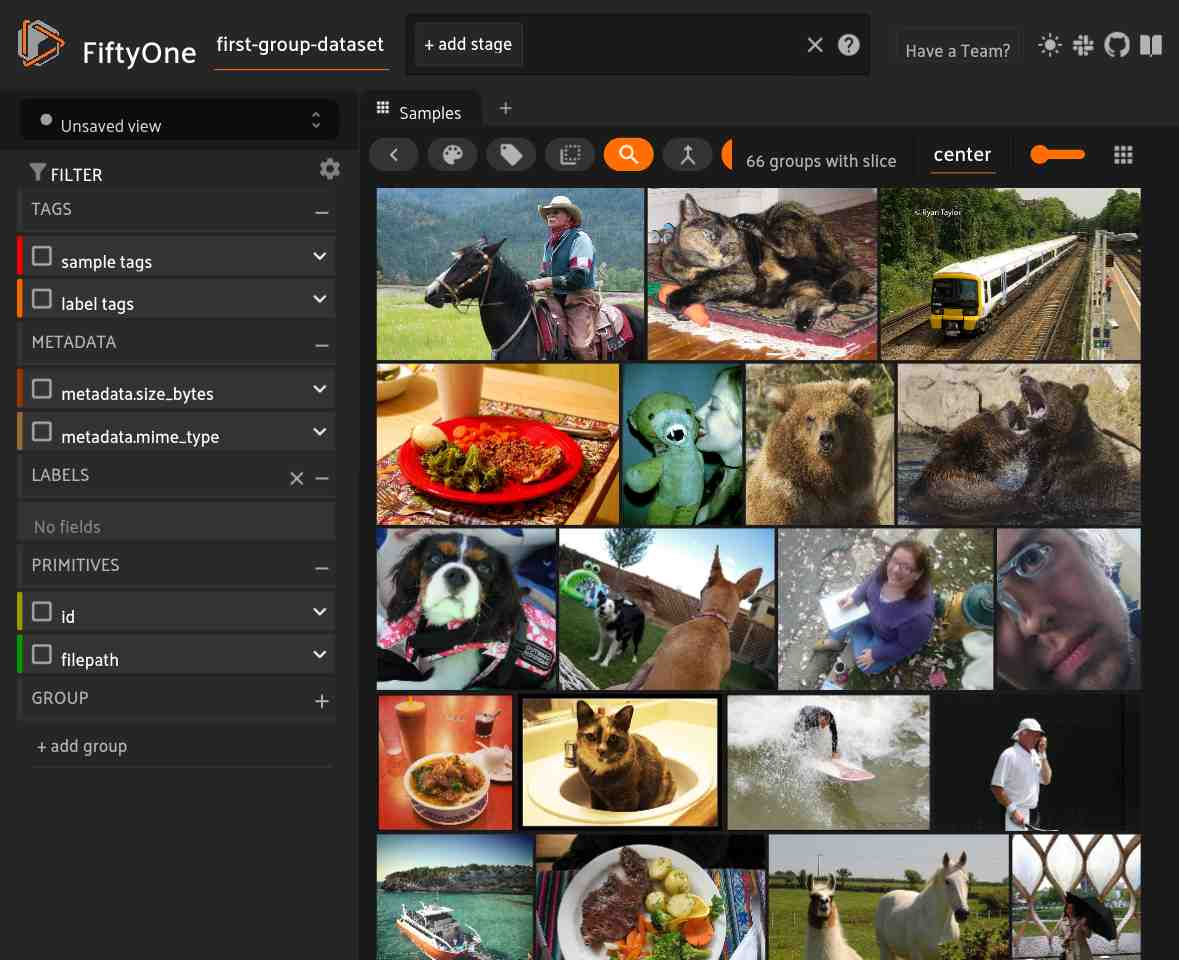

In [4]:
session = fo.launch_app(dataset)

### Grabbing basic information

In [5]:
print(dataset.group_slices)

['left', 'center', 'right']


In [6]:
print(dataset.group_media_types)

{'left': 'image', 'center': 'image', 'right': 'image'}


### Grabbing a single sample

In [7]:
sample = dataset.shuffle().first()
print(sample)

<SampleView: {
    'id': '64f0ff20cb1bdc1e2ee070e6',
    'media_type': 'image',
    'filepath': '/home/dan/fiftyone/quickstart/data/003344.jpg',
    'tags': [],
    'metadata': None,
    'group': <Group: {'id': '64f0ff20cb1bdc1e2ee070a1', 'name': 'center'}>,
}>


 ### In a grouped dataset, you have one active group slice at a time. A group slice makes up each inidividual sample of each group in that slice. Another way to put it is that in the left group slice, we will see all the left photos. We can change this easily by following below:

In [8]:
dataset.group_slice = "left"
sample = dataset.shuffle().first()
print(sample)

<SampleView: {
    'id': '64f0ff20cb1bdc1e2ee07166',
    'media_type': 'image',
    'filepath': '/home/dan/fiftyone/quickstart/data/003420.jpg',
    'tags': [],
    'metadata': None,
    'group': <Group: {'id': '64f0ff20cb1bdc1e2ee070cc', 'name': 'left'}>,
}>



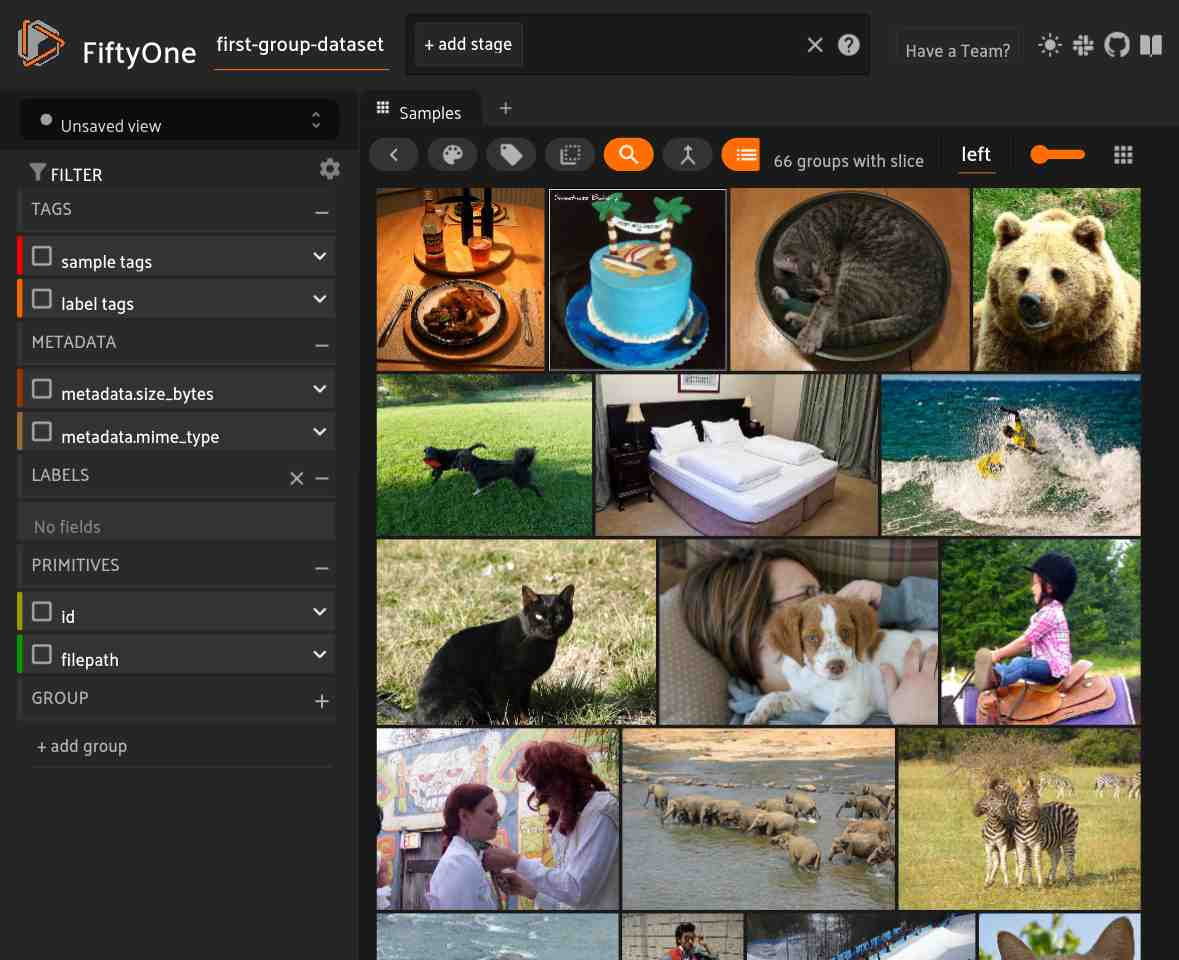

In [9]:
session = fo.launch_app(dataset)

In [10]:
dataset.group_slice = "center"

In [11]:
sample = dataset.shuffle().first()
group_id = sample.group.id

group = dataset.get_group(group_id)
print(group)

{'left': <Sample: {
    'id': '64f0ff20cb1bdc1e2ee07109',
    'media_type': 'image',
    'filepath': '/home/dan/fiftyone/quickstart/data/004781.jpg',
    'tags': [],
    'metadata': None,
    'group': <Group: {'id': '64f0ff20cb1bdc1e2ee070ad', 'name': 'left'}>,
}>, 'center': <Sample: {
    'id': '64f0ff20cb1bdc1e2ee0710a',
    'media_type': 'image',
    'filepath': '/home/dan/fiftyone/quickstart/data/003614.jpg',
    'tags': [],
    'metadata': None,
    'group': <Group: {'id': '64f0ff20cb1bdc1e2ee070ad', 'name': 'center'}>,
}>, 'right': <Sample: {
    'id': '64f0ff20cb1bdc1e2ee0710b',
    'media_type': 'image',
    'filepath': '/home/dan/fiftyone/quickstart/data/002514.jpg',
    'tags': [],
    'metadata': None,
    'group': <Group: {'id': '64f0ff20cb1bdc1e2ee070ad', 'name': 'right'}>,
}>}


In [12]:
import fiftyone as fo
import fiftyone.zoo as foz
from fiftyone import ViewField as F

dataset = foz.load_zoo_dataset("quickstart-groups")

print(dataset.group_slice)
# left

session = fo.launch_app(dataset)

Dataset already downloaded
Loading 'quickstart-groups'
 100% |█████████████████| 600/600 [2.0s elapsed, 0s remaining, 308.7 samples/s]      
Dataset 'quickstart-groups' created
left


In [13]:
# Filters based on the content in the 'left' slice
view = (
    dataset
    .match_tags("train")
    .filter_labels("ground_truth", F("label") == "Pedestrian")
)

In [14]:
from fiftyone import ViewField as F

dataset.compute_metadata()

# Match groups whose `left` image has a height of at least 640 pixels and
# whose `right` image has a height of at most 480 pixels
view = dataset.match(
    (F("groups.left.metadata.height") >= 640)
    & (F("groups.right.metadata.height") <= 480)
)

print(view)


Dataset:     quickstart-groups
Media type:  group
Group slice: left
Num groups:  0
Group fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.Metadata)
    group:        fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.groups.Group)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
View stages:
    1. Match(filter={'$expr': {'$and': [...]}})


In [15]:
bbox_width = F("bounding_box")[2] * F("$metadata.width")
bbox_height = F("bounding_box")[3] * F("$metadata.height")
bbox_area = bbox_width * bbox_height

print(dataset.group_slice)
# left

print(dataset.count("ground_truth.detections"))

print(dataset.mean("ground_truth.detections[]", expr=bbox_area))

left
1379
9291.526529006525


In [16]:
dataset.group_slice = "right"

print(dataset.count("ground_truth.detections"))

print(dataset.bounds("ground_truth.detections[]", expr=bbox_area))

1100
(221.24430441846425, 466616.0)


In [17]:
print(dataset.count())  # 200
print(dataset.count("ground_truth.detections"))  # 1438

view3 = dataset.select_group_slices(["left", "right"])

print(view3.count())  # 400
print(view3.count("ground_truth.detections"))  # 2876

200
1100
400
2479


In [18]:
bbox_width = F("bounding_box")[2] 
bbox_height = F("bounding_box")[3] 
bbox_area = bbox_width * bbox_height

view = dataset.filter_labels("ground_truth", (0.05 <= bbox_area) & (bbox_area < 0.5))
print(view)

Dataset:     quickstart-groups
Media type:  group
Group slice: right
Num groups:  86
Group fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.Metadata)
    group:        fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.groups.Group)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
View stages:
    1. FilterLabels(field='ground_truth', filter={'$and': [{...}, {...}]}, only_matches=True, trajectories=False)
